In [1]:
using DSP

In [2]:
using LsqFit

In [3]:
using PyPlot

In [4]:
# matplotlib parameters
matplotlib["rcParams"][:update](["axes.labelsize" => 22,
                                 "axes.titlesize" => 20,
                                 "font.size" => 18,
                                 "legend.fontsize" => 14,
                                 "axes.linewidth" => 1.5,
                                 "font.family" => "serif",
                                 "font.serif" => "Computer Modern Roman",
                                 "xtick.labelsize" => 20,
                                 "xtick.major.size" => 5.5,
                                 "xtick.major.width" => 1.5,
                                 "ytick.labelsize" => 20,
                                 "ytick.major.size" => 5.5,
                                 "ytick.major.width" => 1.5,
                                 "text.usetex" => true,
                                 "figure.autolayout" => true])

In [5]:
import BP

In [6]:
exdef = BP.ExactStates(100, :symmetric, 45, 1/7, 0.06);

In [7]:
#full plot range, both in x and y
const xm = [-div(exdef.N-1,2):div(exdef.N-1,2)];

In [8]:
β=5;

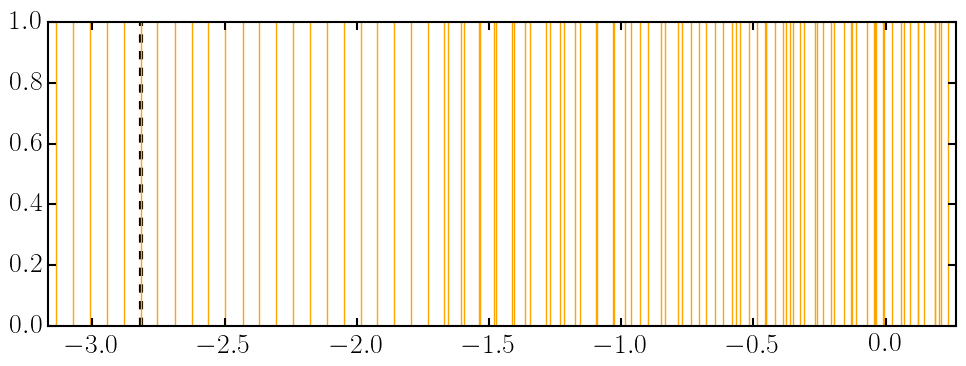

In [9]:
f, ax = plt.subplots(figsize=(10, 4))

ax[:axvline](x = exdef.νs[β+1], color="black", ls="dashed", linewidth="3")

for ω in exdef.νs
    ax[:axvline](x = ω, color="orange")
end 

ax[:set_xlim](exdef.νs[1] - 0.03, exdef.νs[end] + 0.03)

plt.close(f)

In [10]:
state = BP.getstate(exdef, β+1);

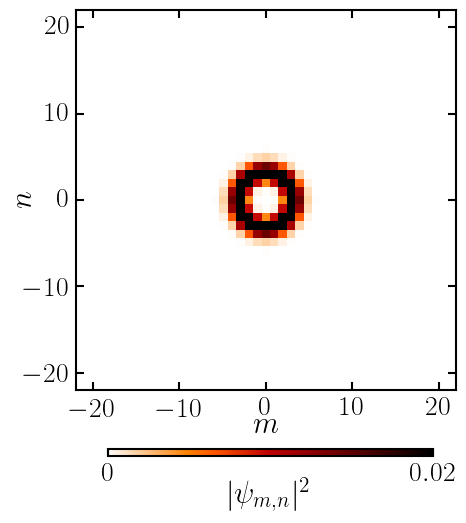

In [11]:
f, ax = plt.subplots(figsize=(5, 5))
img = ax[:imshow](abs2(state), origin="upper", ColorMap("gist_heat_r"), interpolation="none",
                 extent=[xm[1], xm[end], xm[1], xm[end]],
                 vmin=0, vmax=0.02)

ax[:set_ylabel](L"$n$", labelpad=-10)
ax[:set_xlabel](L"$m$", labelpad=-6)
    
cbaxes = f[:add_axes]([0.25, 0.03, 0.65, 0.015])
cbar = f[:colorbar](img, cax=cbaxes, orientation="horizontal")
cbar[:set_ticks]([0, 0.02])
cbar[:set_ticklabels]([L"$0$", L"$0.02$"])
cbar[:set_label](L"$|\psi_{m,n}|^2$", rotation=0, labelpad=-5, y=0.5)
cbar[:solids][:set_edgecolor]("face")

plt.close(f)

In [12]:
βs = Dict([((7, 0.02), [3, 6, 10, 15, 20, 28, 35, 42, 52]), ((11, 0.02), [3, 4, 7, 10, 13, 18, 24, 30, 38]),
    ((15, 0.02), [3, 5, 8, 10, 14, 19, 27, 35, 45]), ((7, 0.06), [3, 4, 7, 12, 15, 21])])

Dict{(Int64,Float64),Array{Int64,1}} with 4 entries:
  (11,0.02) => [3,4,7,10,13,18,24,30,38]
  (7,0.02)  => [3,6,10,15,20,28,35,42,52]
  (15,0.02) => [3,5,8,10,14,19,27,35,45]
  (7,0.06)  => [3,4,7,12,15,21]

In [13]:
#radii = Array(Int, 6);

In [14]:
#for (j,β) in enumerate(βs[(7, 0.06)])
#    state = BP.getstate(exdef, β+1)
#    radii[j] = BP.radius(abs2(state), xm)
#end

In [15]:
#plot(βs[(7, 0.06)], radii.^2, marker="o")

In [16]:
radii = Array(Int, (9,2));

In [17]:
for (i,q) in enumerate([7,11])
    exdef = BP.ExactStates(100, :symmetric, 45, 1/q, 0.02)
    for (j,β) in enumerate(βs[(q, 0.02)])
        state = BP.getstate(exdef, β+1)
        radii[j,i] = BP.radius(abs2(state), xm)
    end
end

In [18]:
colors = ["r", "g"];
markers = ["s", "v"];
styles = ["dashed", "dotted"];

In [19]:
model(x,p) = p[1] .* x

model (generic function with 1 method)

In [20]:
as = [curve_fit(model, βs[(q, 0.02)], radii[:,i].^2, [1.]).param[1] for (i,q) in enumerate([7,11])]

2-element Array{Float64,1}:
 2.34745
 3.33343

In [66]:
7/π

2.228169203286535

In [67]:
11/π

3.5014087480216975

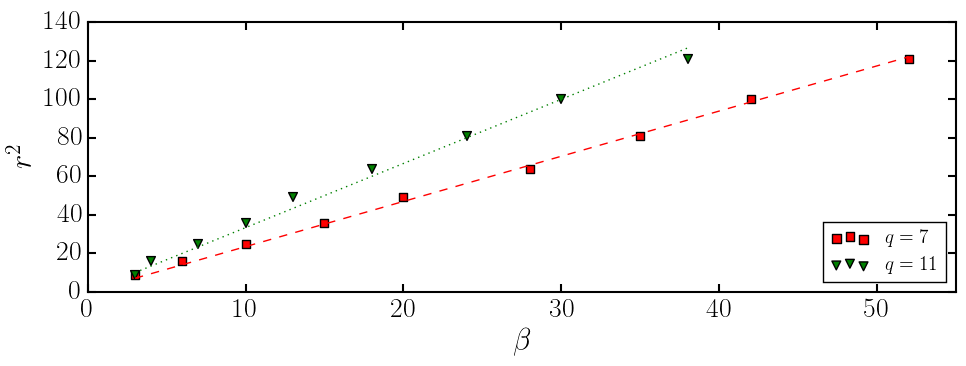

In [21]:
f, ax = plt.subplots(figsize=(10, 4))

for (i,q) in enumerate([7,11])
    ax[:scatter](βs[(q, 0.02)], radii[:,i].^2, c=colors[i], marker=markers[i], s=40, label=LaTeXString(string("\$q=",q,"\$")))
    ax[:plot](βs[(q, 0.02)], as[i] .* βs[(q, 0.02)], ls=styles[i], color=colors[i])
end

ax[:legend](loc="lower right")



ax[:set_xlim](0, 55)
ax[:set_ylim](0, 140)

ax[:set_xlabel](L"$\beta$")
ax[:set_ylabel](L"$r^2$ ")

#f[:savefig]("../figures/ring_scaling_q.svg", transparent=true, pad_inches=0.0, bbox_inches="tight")

plt.close(f)

In [29]:
βs = Dict([((7, 0.02), [3, 6, 10, 15, 20, 28]), ((7, 0.06), [3, 4, 7, 12, 15, 21])]);

In [30]:
radii = Array(Int, (6,2));

In [31]:
for (i,κ) in enumerate([0.02, 0.06])
    exdef = BP.ExactStates(100, :symmetric, 45, 1/7, κ)
    for (j,β) in enumerate(βs[(7, κ)])
        state = BP.getstate(exdef, β+1)
        radii[j,i] = BP.radius(abs2(state), xm)
    end
end

In [32]:
as = [curve_fit(model, βs[(7, κ)], radii[:,i].^2, [1.]).param[1] for (i,κ) in enumerate([0.02, 0.06])]

2-element Array{Float64,1}:
 2.3713 
 2.29525

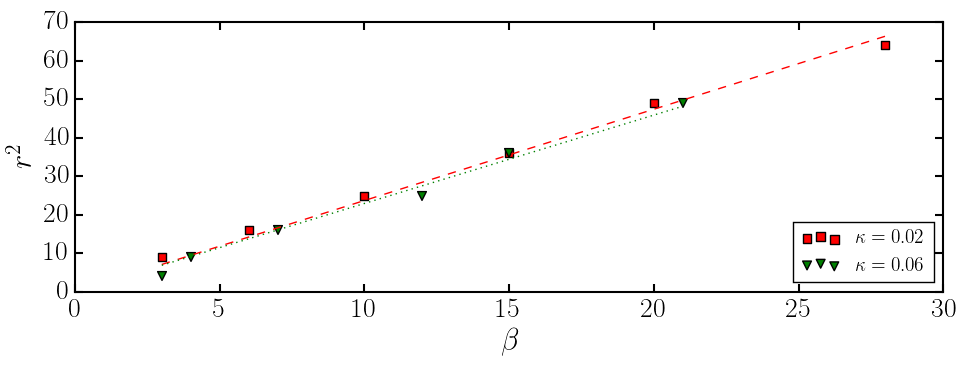

In [33]:
f, ax = plt.subplots(figsize=(10, 4))

for (i,κ) in enumerate([0.02, 0.06])
    ax[:scatter](βs[(7, κ)], radii[:,i].^2, c=colors[i], marker=markers[i], s=40, label=LaTeXString(string("\$\\kappa=",κ,"\$")))
    ax[:plot](βs[(7, κ)], as[i] .* βs[(7, κ)], ls=styles[i], color=colors[i])
end

ax[:legend](loc="lower right")



ax[:set_xlim](0, 30)
ax[:set_ylim](0, 70)

ax[:set_xlabel](L"$\beta$")
ax[:set_ylabel](L"$r^2$ ")

#f[:savefig]("../figures/ring_scaling_k.pdf", transparent=true, pad_inches=0.0, bbox_inches="tight")

plt.close(f)

## Momentum space

### relevant picture to test on

In [34]:
β=10;

In [35]:
state = BP.getstate(exdef, β+1);

In [36]:
extrema(abs2(fftshift(fft(state))))

(5.376353810378493e-29,3.334803176763154)

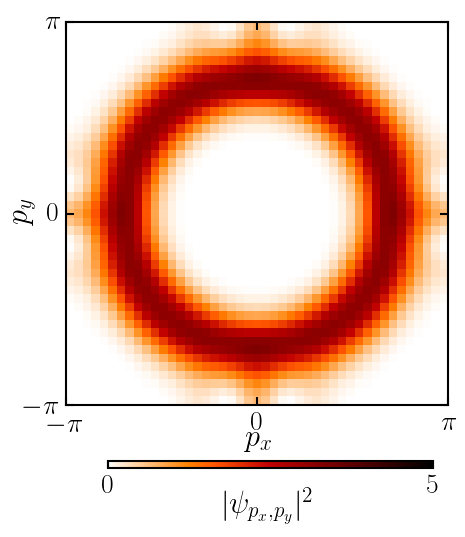

In [37]:
f, ax = plt.subplots(figsize=(5, 5))

img = ax[:imshow](abs2(fftshift(fft(state))),
            origin="upper", ColorMap("gist_heat_r"), interpolation="none",
            extent=[-π, π, -π, π],
            vmin=0, vmax=5)

ax[:set_xticks]([-π,0,π])
ax[:set_yticks]([-π,0,π])

ax[:set_xticklabels]([L"$-\pi$",L"$0$",L"$\pi$"])
ax[:set_yticklabels]([L"$-\pi$",L"$0$",L"$\pi$"])

ax[:set_xlabel](L"$p_x$", labelpad=-4)
ax[:set_ylabel](L"$p_y$", labelpad=-10)

cbaxes = f[:add_axes]([0.25, 0.03, 0.65, 0.015])
cbar = f[:colorbar](img, cax=cbaxes, orientation="horizontal")
cbar[:set_ticks]([0, 5])
cbar[:set_label](L"$|\psi_{p_x,p_y}|^2$", rotation=0, labelpad=-5, y=0.5)
cbar[:solids][:set_edgecolor]("face")

plt.close(f)

### testing radius finding function

In [38]:
km = [2π*fftshift(fftfreq(length(xm)))];
BP.radius(abs2(fftshift(fft(state))), km)

2.234021442552742

In [39]:
# expected radius: ~π/2

In [40]:
#full plot range, both in x and y
const xm = [-div(exdef.N-1,2):div(exdef.N-1,2)];

In [41]:
km = [2π*fftshift(fftfreq(length(xm)))];

In [42]:
βs = Dict([((7, 0.02), [3, 6, 10, 15, 20]), ((11, 0.02), [3, 4, 7, 10, 13]),
    ((15, 0.02), [3, 5, 8, 10, 14, 19, 27, 35, 45]), ((7, 0.06), [3, 4, 7, 12, 15, 21])]);

In [43]:
radii = Array(Float64, (5,2));

In [44]:
for (i,q) in enumerate([7,11])
    exdef = BP.ExactStates(100, :symmetric, 45, 1/q, 0.02)
    for (j,β) in enumerate(βs[(q, 0.02)])
        state = BP.getstate(exdef, β+1)
        radii[j,i] = BP.radius(abs2(fftshift(fft(state))), km)
    end
end

In [45]:
colors = ["r", "g"];
markers = ["s", "v"];
styles = ["dashed", "dotted"];

In [46]:
model(x,p) = p[1] .* x

model (generic function with 1 method)

In [47]:
as = [curve_fit(model, βs[(q, 0.02)], radii[:,i].^2, [1.]).param[1] for (i,q) in enumerate([7,11])]

2-element Array{Float64,1}:
 0.45184 
 0.289363

In [64]:
π/7

0.4487989505128276

In [65]:
π/11

0.28559933214452665

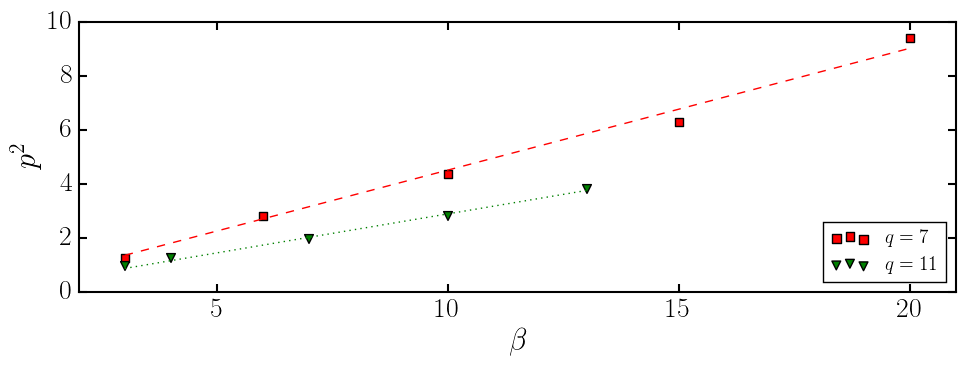

In [48]:
f, ax = plt.subplots(figsize=(10, 4))

for (i,q) in enumerate([7,11])
    ax[:scatter](βs[(q, 0.02)], radii[:,i].^2, c=colors[i], marker=markers[i], s=40, label=LaTeXString(string("\$q=",q,"\$")))
    ax[:plot](βs[(q, 0.02)], as[i] .* βs[(q, 0.02)], ls=styles[i], color=colors[i])
end

ax[:legend](loc="lower right")



ax[:set_xlim](2, 21)
ax[:set_ylim](0, 10)

ax[:set_xlabel](L"$\beta$")
ax[:set_ylabel](L"$p^2$ ")

#f[:savefig]("../figures/ring_scaling_q_mom.svg", transparent=true, pad_inches=0.0, bbox_inches="tight")

plt.close(f)